In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from implementations import *


In [2]:
x_tr = pd.read_csv('data/x_train.csv')
y_tr = pd.read_csv('data/y_train.csv')

In [3]:
x_tr.shape

(328135, 321)

In [4]:
x_tr.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,53,11,11162015,11,16,2015,1100,2015015629,2015015629,NaN,...,1,1,3.0,3.0,4.0,1,1,NaN,NaN,2.0
1,33,12,12152015,12,15,2015,1200,2015004387,2015004387,1.0,...,9,9,3.0,3.0,4.0,9,9,NaN,NaN,NaN
2,20,10,10202015,10,20,2015,1100,2015005638,2015005638,1.0,...,4,2,2.0,2.0,3.0,1,1,1.0,2.0,2.0
3,42,6,6182015,6,18,2015,1100,2015004694,2015004694,NaN,...,2,2,2.0,2.0,3.0,1,1,2.0,2.0,2.0
4,24,11,11062015,11,6,2015,1100,2015004673,2015004673,1.0,...,9,9,3.0,3.0,4.0,1,1,9.0,9.0,2.0


In [5]:
list(x_tr.columns)

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'CTELNUM1',
 'CELLFON2',
 'CADULT',
 'PVTRESD2',
 'CCLGHOUS',
 'CSTATE',
 'LANDLINE',
 'HHADULT',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BPMEDS',
 'BLOODCHO',
 'CHOLCHK',
 'TOLDHI2',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKIDNY',
 'DIABETE3',
 'DIABAGE2',
 'SEX',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL2',
 'NUMPHON2',
 'CPDEMO1',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE5',
 'MAXDRNKS',
 'FRUITJU

In [6]:
list(x_tr.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 

In [11]:
x_tr["EXEROFT1"]

0         102.0
1           NaN
2         103.0
3         105.0
4         220.0
          ...  
328130    103.0
328131    105.0
328132    104.0
328133    202.0
328134    104.0
Name: EXEROFT1, Length: 328135, dtype: float64

In [8]:
x_tr_cleaned=x_tr.fillna(0)

In [23]:
features_to_scale=[]
for feature in list(x_tr.columns):
    if x_tr[feature].dtype==np.float64:
        features_to_scale.append(feature)

In [24]:
features_to_scale

['CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'CTELNUM1',
 'CELLFON2',
 'CADULT',
 'PVTRESD2',
 'CCLGHOUS',
 'CSTATE',
 'LANDLINE',
 'HHADULT',
 'GENHLTH',
 'PHYSHLTH',
 'POORHLTH',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BPMEDS',
 'CHOLCHK',
 'TOLDHI2',
 'ASTHNOW',
 'CHCSCNCR',
 'HAVARTH3',
 'DIABETE3',
 'DIABAGE2',
 'NUMHHOL2',
 'NUMPHON2',
 'CPDEMO1',
 'VETERAN3',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE5',
 'MAXDRNKS',
 'FRUITJU1',
 'FRUIT1',
 'FVBEANS',
 'FVGREEN',
 'FVORANG',
 'VEGETAB1',
 'EXERANY2',
 'EXRACT11',
 'EXEROFT1',
 'EXERHMM1',
 'EXRACT21',
 'EXEROFT2',
 'EXERHMM2',
 'STRENGTH',
 'LMTJOIN3',
 'ARTHDIS2',
 'ARTHSOCL',
 'JOINPAIN',
 'SEATBELT',
 'FLUSHOT6',
 'FLSHTMY2',
 'IMFVPLAC',
 'PNEU

In [20]:
x_tr_cleaned.dtypes

_STATE        int64
FMONTH        int64
IDATE         int64
IMONTH        int64
IDAY          int64
             ...   
_RFSEAT2      int64
_RFSEAT3      int64
_FLSHOT6    float64
_PNEUMO2    float64
_AIDTST3    float64
Length: 321, dtype: object

In [9]:
x_tra, x_val, y_tra, y_val=split_data(x_tr_cleaned.values,y_tr.values.ravel(),ratio=0.75,seed=69)

### Simple linear model

In [10]:
np.where(np.isnan(y_tr.values.ravel()))

(array([], dtype=int64),)

In [17]:
w_opt,  mse=mean_squared_error_sgd(y_tr.values.ravel(),x_tr_cleaned.values,np.zeros(x_tr.shape[1]),max_iters=10,gamma=0.01,batch_size=64)

In [10]:

def chi2_test_1(X, y):
    """
    Computes the chi-squared statistic for each feature in X with respect to the target variable y.

    Parameters:
    X (numpy.ndarray): Input feature matrix of shape (N, D).
    y (numpy.ndarray): Target array of shape (N,).

    Returns:
    chi2_scores (numpy.ndarray): Chi-squared scores for each feature.
    """
    num_features = X.shape[1]
    chi2_scores = np.zeros(num_features)

    for i in range(num_features):
        if i%10==0:
            print(i)
        # Create a mapping from feature values to integers
        feature_to_int = {val: idx for idx, val in enumerate(np.unique(X[:, i]))}
        mapped_feature_values = np.array([feature_to_int[val] for val in X[:, i]])

        # Create a contingency table for the current feature and target
        num_unique_values = len(feature_to_int)
        contingency_table = np.zeros((num_unique_values, len(np.unique(y))))
        
        for j in range(len(mapped_feature_values)):
            feature_val = mapped_feature_values[j]
            target_val = y[j]
            contingency_table[feature_val, target_val] += 1
        
        # Calculate expected frequencies
        row_sums = np.sum(contingency_table, axis=1)
        col_sums = np.sum(contingency_table, axis=0)
        total_samples = np.sum(contingency_table)
        expected = np.outer(row_sums, col_sums) / total_samples

        # Calculate chi-squared statistic
        chi2 = np.sum((contingency_table - expected) ** 2 / expected)
        chi2_scores[i] = chi2

    return chi2_scores

In [14]:
chi2_scores=chi2_test_1(x_tr_cleaned.values,y_tr.values.ravel())

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320


In [15]:
print(chi2_scores[np.array([281,229])])

[6.27338726e-02 2.31741653e+05]


In [10]:
top_features=np.argsort(chi2_scores)[::-1]

NameError: name 'chi2_scores' is not defined

In [10]:
top_features=np.array([229,  26, 287, 288,   7,   8, 248, 246, 230,  35,  58, 249,  34,
       232,  69,  39, 319, 247, 318, 231,  38, 234,  66,  27,  44, 315,
        49,  65, 226,  48, 222, 313, 103,  97,  98, 314,  95,  45, 238,
        96,  29, 155, 253,  61,  71,  37,  47,  51, 112, 116, 114, 109,
       110, 113, 220, 219, 111, 115, 117, 301,  57,  59, 256,  70,  60,
        73, 259,  75,  64, 258,  72, 102,  67,  88,  91,  68,  62, 252,
        31, 136,  15,  56, 264, 233, 289,  77, 262,  90, 291, 304,  79,
        80, 138, 201, 137,  36, 299,  78, 140, 261,  52, 257, 141,  20,
       295,  43,  42, 224, 225,  33, 285,  93, 292,  89, 293,  24,  25,
       305, 308, 300, 223, 218,  92, 294,  23, 290, 216,  13,  21, 200,
       307,  87,  54, 302,  10,  12,  18,   9,  19, 284, 202,  84,  94,
       296, 144, 197, 286,  28, 101,  50, 100, 297,  46, 277, 254, 139,
         0, 269, 106, 162, 255, 263, 228, 237, 236, 276, 105, 196,  41,
       195, 194, 157,  82, 311, 160,  16, 143, 165, 163, 164,  40, 235,
        63, 267, 159, 303, 161,  81,   2, 251, 250, 266, 181, 104, 179,
       169, 183, 320, 182, 306,  17, 242, 310,  86, 142, 312, 209,  30,
       119, 156, 271,  85, 213,  83, 167, 108, 192, 180, 239, 245, 244,
       208, 270, 158, 193, 210, 240, 206, 207,  99, 227, 279, 211, 268,
       176, 212, 214, 173, 241, 107, 215, 243, 265,   4, 145, 166, 273,
       170,  74, 316, 221, 126,  32, 188, 260, 174, 189, 118, 203, 175,
       150, 187, 133,   6, 186, 172, 149, 127, 205, 168, 317, 204, 309,
       272,  55, 184, 151, 152, 128, 199,  22, 129, 134, 185,   5,  53,
       121, 154, 148, 146, 130, 190, 178, 135, 153, 278, 147, 198, 171,
       132,  76,   1, 298, 177, 120, 191, 217, 283, 275, 122, 125, 124,
         3, 123, 131,  14, 282,  11, 280, 274, 281], dtype=np.int64)

In [11]:
def get_top_k_fetaures(top_features,k):
    return top_features[:k]

In [12]:
top15=get_top_k_fetaures(top_features,15)

In [13]:
list(x_tr.columns[top15])

['_LLCPWT',
 'GENHLTH',
 'MAXVO2_',
 'FC60_',
 'SEQNO',
 '_PSU',
 '_AGE80',
 '_AGEG5YR',
 '_RFHLTH',
 'BPMEDS',
 'EMPLOY1',
 '_AGE_G',
 'BPHIGH4',
 '_RFHYPE5',
 'DIFFWALK']

In [15]:
w_ridge,mse=ridge_regression(y_tra,x_tra[:,top15],lambda_=0.3)

In [16]:
w_ridge

array([ 2.45154877e-05,  3.92414982e-02, -2.24354994e-03,  2.14547899e-03,
       -8.16240541e+05,  8.16240541e+05,  1.48249393e-03,  2.22999168e-03,
       -3.61292097e-03,  7.68520964e-03,  5.71682751e-03, -5.32669744e-03,
       -8.38210154e-03, -1.43239157e-03, -5.08117214e-03])

In [18]:
train_loss=np.sqrt(2*compute_mse_loss(y_tra,x_tra[:,top15],w_ridge))
val_loss=np.sqrt(2*compute_mse_loss(y_val,x_val[:,top15],w_ridge))
print("RMSE train loss : {}".format(train_loss))
print("RMSE val loss : {}".format(val_loss))


RMSE train loss : 0.2826574229039749
RMSE val loss : 0.2809111800709291


In [76]:
k=np.random.randint(0,50000)
print(k)
print(x_tra[k,top15].dot(w_ridge.T))
print(y_tra[k])

44493
0.052631572436347786
0


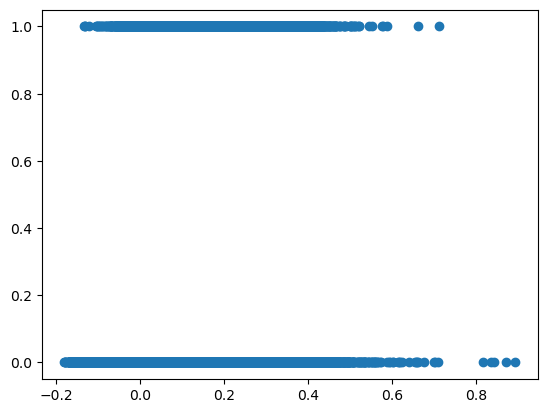

In [90]:
plt.scatter(x_tra[:,top15].dot(w_ridge.T),y_tra)

In [93]:
y_tr.value_counts()/y_tr.shape[0]

_MICHD
0         0.911698
1         0.088302
Name: count, dtype: float64

### Logistic regression

In [15]:
np.zeros((15,1)).shape

(15, 1)

In [18]:
w_opt,loss=logistic_regression(y_tra,x_tra[:,top15],initial_w=np.zeros((15,1)),max_iters=5,gamma=0.0002)

c:\Users\Alexi\Documents\EPFL\M11\Machine Learning\P1\ml-project-1-whai\implementations.py:182: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-t))
c:\Users\Alexi\Documents\EPFL\M11\Machine Learning\P1\ml-project-1-whai\implementations.py:204: RuntimeWarning: divide by zero encountered in log
  y[i] * np.log(sigmoid(tx[i, :] @ w))
c:\Users\Alexi\Documents\EPFL\M11\Machine Learning\P1\ml-project-1-whai\implementations.py:204: RuntimeWarning: invalid value encountered in multiply
  y[i] * np.log(sigmoid(tx[i, :] @ w))
c:\Users\Alexi\Documents\EPFL\M11\Machine Learning\P1\ml-project-1-whai\implementations.py:182: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-t))
c:\Users\Alexi\Documents\EPFL\M11\Machine Learning\P1\ml-project-1-whai\implementations.py:204: RuntimeWarning: divide by zero encountered in log
  y[i] * np.log(sigmoid(tx[i, :] @ w))
c:\Users\Alexi\Documents\EPFL\M11\Machine Learning\P1\ml-project-1-whai\implementations.py:204:

KeyboardInterrupt: 

In [16]:
loss

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [21]:
x_tr["IDATE"]

0         11162015
1         12152015
2         10202015
3          6182015
4         11062015
            ...   
328130    11232015
328131     6082015
328132    10202015
328133    12302015
328134     9122015
Name: IDATE, Length: 328135, dtype: int64